In [1]:
import matplotlib.pyplot as plt
import pdb
import numpy as np
np.set_printoptions(precision=5, suppress=True,)

from TetriumColor import ColorSpace, ColorSampler, ColorSpaceType
from TetriumColor.Observer import Observer, Spectra
from TetriumColor.Measurement import load_primaries_from_csv
from TetriumColor.Utils.ParserOptions import AddObserverArgs
from TetriumColor.Utils.ImageUtils import CreatePaddedGrid


In [2]:
%load_ext autoreload
%autoreload 2

No illuminant provided, using Illuminant D65


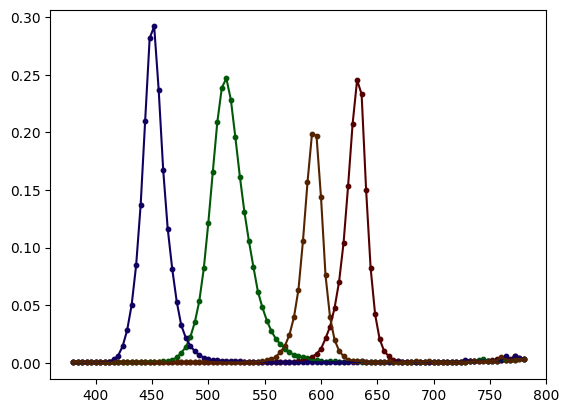

In [9]:
observer = Observer.tetrachromat()
primaries = load_primaries_from_csv("../../measurements/2025-10-12/primaries")
for p in primaries:
    p.data = p.data * 1000
    p.plot(color=p.to_rgb())
plt.show()
cs = ColorSpace(observer, cst_display_type="led", display_primaries=primaries)

In [7]:
metamer_cone = np.array(cs.get_maximal_metamer_pair_in_disp(2))
print("cones: ", metamer_cone)
bgor = cs.convert(metamer_cone, ColorSpaceType.CONE, ColorSpaceType.DISP)
metamers = [Spectra.add(Spectra.multiply(primaries, bgor[0])), Spectra.add(Spectra.multiply(primaries, bgor[1]))]
observer.observe_spectras(metamers)

cones:  [[ 1.19174  0.34003  0.40322  0.40161]
 [ 1.19174  0.34003  0.37394  0.40161]]


array([[ 0.10611,  0.03028,  0.0359 ,  0.03576],
       [ 0.10611,  0.03028,  0.0333 ,  0.03576]])

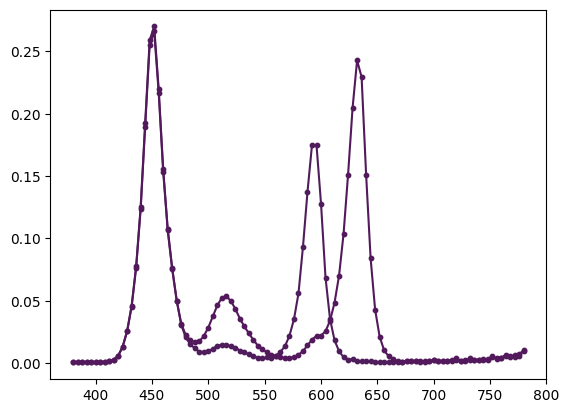

In [8]:
for m in metamers:
    m.plot(color=m.to_rgb())
plt.show()